In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import torch
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters())

In [3]:
import numpy as np
from tqdm.notebook import trange

def get_lr_history(scheduler, num_epochs = 100):
    history = []
    for epoch in trange(num_epochs):
        history.append(optimizer.param_groups[0]["lr"])
        scheduler.step(epoch)
    return np.array(history)


def visualize(history):
    plt.plot(history)
    plt.ylabel("Learning Rate")
    plt.xlabel("Epoch")
    plt.show()

## ReduceLROnPlateau

  0%|          | 0/100 [00:00<?, ?it/s]

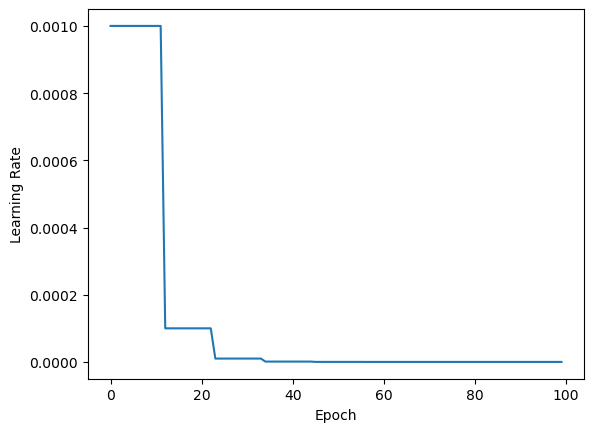

In [4]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
history = get_lr_history(scheduler)
visualize(history)

## [Llama2](https://arxiv.org/pdf/2307.09288.pdf) scheduler

In [5]:
!pip install lightning-bolts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 40.4 MB/s eta 0:00:00
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.0.4
    Uninstalling pytorch-lightning-2.0.4:
      Successfully uninstalled pytorch-lightning-2.0.4


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

  0%|          | 0/200000 [00:00<?, ?it/s]

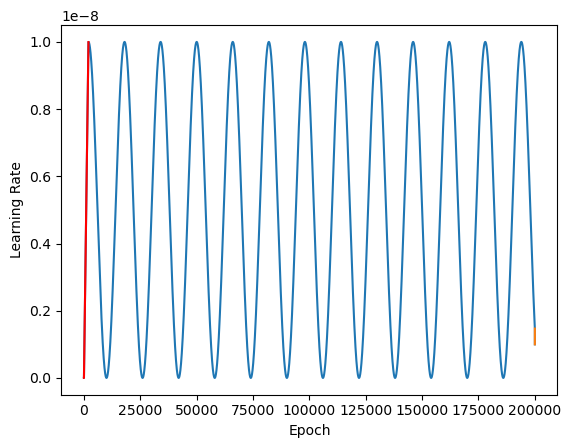

In [6]:
from pl_bolts.optimizers.lr_scheduler import LinearWarmupCosineAnnealingLR

num_epochs = int(2e5)

scheduler = LinearWarmupCosineAnnealingLR(optimizer = optimizer, warmup_epochs=2000, max_epochs = 10000)
history = get_lr_history(scheduler, num_epochs = num_epochs)
#final lr = 10% of peak lr
history[-1] = history.max()*0.1

plt.plot(history)
plt.ylabel("Learning Rate")
plt.xlabel("Epoch")

#visualize warmup
plt.plot(history[:2000], color = 'red')

#visualize final lr
peak_idx = np.where(history == history.max())
peak = history[peak_idx]
plt.plot([num_epochs - 2, num_epochs - 1],[history[num_epochs - 2], history[num_epochs - 1]])

plt.show()